In [1]:
import scanpy as sc
import pandas as pd
import harmony
print(harmony.__version__)  # Á°ÆËÆ§ÁâàÊú¨
import scanpy.external as scx


0.1.8


In [2]:
#ËΩΩÂÖ•Êï∞ÊçÆ
adata = sc.read_h5ad("/home/cluster2/tangzefang/yangbo/01_data/mouse_gut_normal_62k.h5ad")
#Ê£ÄÊü•Êï∞ÊçÆ
print(adata)
print(adata.obs.columns.tolist()) #ÁªÜËÉûÊ†∑Êú¨‰ø°ÊÅØË°®ÔºåÊù•Ëá™ÁöÑÁªÑÁªáÁñæÁóÖÁ≠â
print(adata.var.columns.tolist()) #Âü∫Âõ†ËØ¥Êòé‰π¶ÔºåÂü∫Âõ†ÂêçÂ≠óidÁ≠â

AnnData object with n_obs √ó n_vars = 62121 √ó 53850
    obs: 'soma_joinid', 'dataset_id', 'assay', 'assay_ontology_term_id', 'cell_type', 'cell_type_ontology_term_id', 'development_stage', 'development_stage_ontology_term_id', 'disease', 'disease_ontology_term_id', 'donor_id', 'is_primary_data', 'observation_joinid', 'self_reported_ethnicity', 'self_reported_ethnicity_ontology_term_id', 'sex', 'sex_ontology_term_id', 'suspension_type', 'tissue', 'tissue_ontology_term_id', 'tissue_type', 'tissue_general', 'tissue_general_ontology_term_id', 'raw_sum', 'nnz', 'raw_mean_nnz', 'raw_variance_nnz', 'n_measured_vars', 'batch'
    var: 'soma_joinid', 'feature_id', 'feature_name', 'feature_type', 'feature_length', 'nnz', 'n_measured_obs'
['soma_joinid', 'dataset_id', 'assay', 'assay_ontology_term_id', 'cell_type', 'cell_type_ontology_term_id', 'development_stage', 'development_stage_ontology_term_id', 'disease', 'disease_ontology_term_id', 'donor_id', 'is_primary_data', 'observation_joinid', 's

In [3]:
print("1. ÂéüÂßãÊï∞ÊçÆlevelsÊÉÖÂÜµ:")
print(f"   ÂéüÂßãlevelsÊï∞Èáè: {len(adata.obs['cell_type'].cat.categories)}")
print(f"   ÂéüÂßãÁªÜËÉûÁ±ªÂûãÁ§∫‰æã:")
for i, category in enumerate(adata.obs['cell_type'].cat.categories[:10]):
    print(f"     {i+1}. {category}")

1. ÂéüÂßãÊï∞ÊçÆlevelsÊÉÖÂÜµ:
   ÂéüÂßãlevelsÊï∞Èáè: 448
   ÂéüÂßãÁªÜËÉûÁ±ªÂûãÁ§∫‰æã:
     1. B cell
     2. B cell zone reticular cell
     3. Bergmann glial cell
     4. CD103-positive dendritic cell
     5. CD141-positive myeloid dendritic cell
     6. CD1c-positive myeloid dendritic cell
     7. CD4-positive, alpha-beta T cell
     8. CD4-positive, alpha-beta memory T cell
     9. CD4-positive, alpha-beta thymocyte
     10. CD8-positive, alpha-beta T cell


Ê∏ÖÁêÜÂâçlevelsÊï∞Èáè: 448
Ê∏ÖÁêÜÂêélevelsÊï∞Èáè: 45


/home/cluster2/tangzefang/yangbo/miniconda3/envs/jupyter/lib/python3.10/site-packages/scanpy/neighbors/__init__.py:586: UserWarning: You‚Äôre trying to run this on 53850 dimensions of `.X`, if you really want this, set `use_rep='X'`.
         Falling back to preprocessing with `sc.pp.pca` and default params.
  X = _choose_representation(self._adata, use_rep=use_rep, n_pcs=n_pcs)


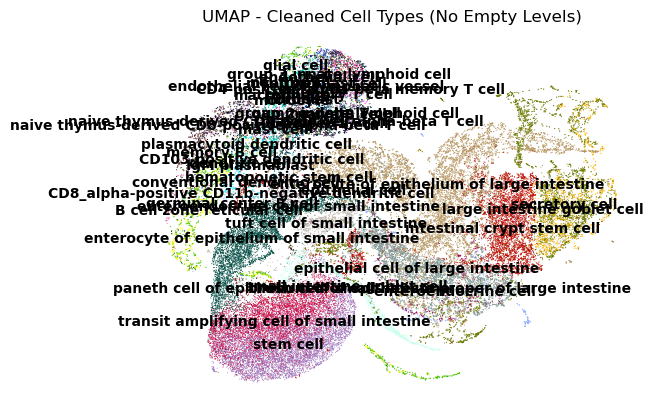

<Figure size 640x480 with 0 Axes>

In [4]:
#ÊñπÊ≥ï1ÔºöÂÖàÊ∏ÖÁêÜlevelsÔºåÂÜçËÆ°ÁÆóUMAPÔºàÊé®ËçêÔºâ
# -------------------------------
# 1. Â§çÂà∂Êï∞ÊçÆÂπ∂Ê∏ÖÁêÜlevels
import matplotlib.pyplot as plt
adata_clean = adata.copy()
adata_clean.obs['cell_type'] = adata_clean.obs['cell_type'].astype(str).astype('category')

print(f"Ê∏ÖÁêÜÂâçlevelsÊï∞Èáè: {len(adata.obs['cell_type'].cat.categories)}")
print(f"Ê∏ÖÁêÜÂêélevelsÊï∞Èáè: {len(adata_clean.obs['cell_type'].cat.categories)}")

# 2. ËÆ°ÁÆóUMAPÔºà‰ΩøÁî®Ê∏ÖÁêÜÂêéÁöÑÊï∞ÊçÆÔºâ
sc.pp.neighbors(adata_clean, n_neighbors=15, n_pcs=25)
sc.tl.umap(adata_clean)

# 3. ÁªòÂà∂UMAPÔºàÁé∞Âú®Âõæ‰æãÂè™ÊòæÁ§∫ÂÆûÈôÖÂ≠òÂú®ÁöÑÁªÜËÉûÁ±ªÂûãÔºâ
sc.pl.umap(adata_clean, color=['cell_type'], 
           title='UMAP - Cleaned Cell Types (No Empty Levels)',
           frameon=False, legend_loc='on data')
plt.savefig('umap_cleaned_levels.png', dpi=300, bbox_inches='tight')
plt.show()


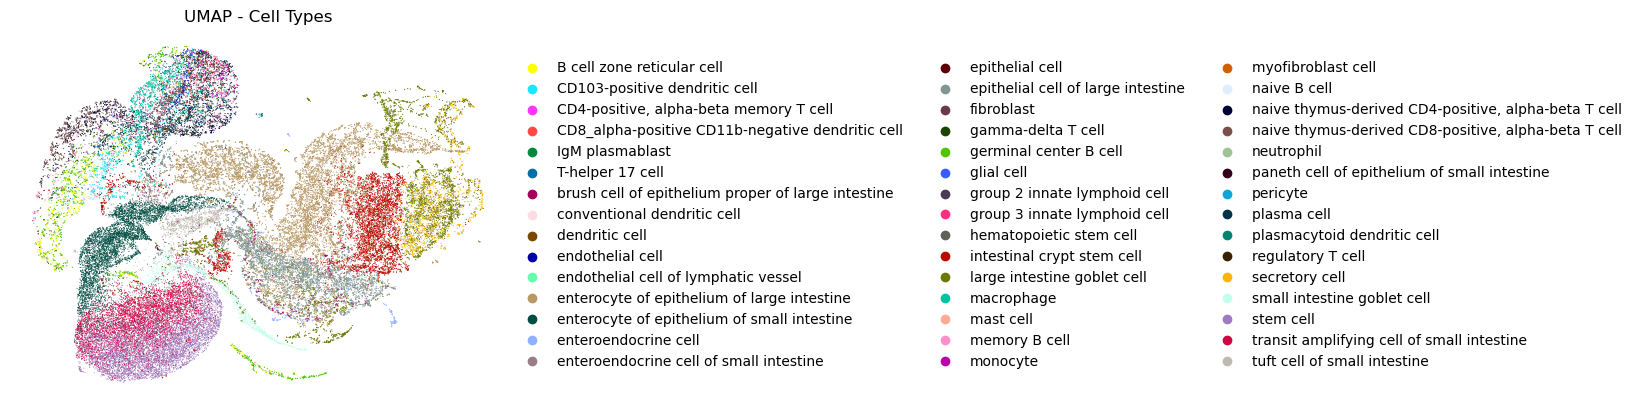

<Figure size 640x480 with 0 Axes>

In [5]:
#Âõæ‰æãÊõ¥Êîπ
sc.pl.umap(adata_clean, color=['cell_type'], 
           title='UMAP - Cell Types',
           frameon=False,
           legend_loc='right margin')  # Âú®Âè≥‰æßÊòæÁ§∫Âõæ‰æã
plt.savefig('umap_right_legend.png', dpi=300, bbox_inches='tight')
plt.show()

     n_genes_by_counts  total_counts  mt_counts  pct_counts_mt
0-0               1301        3640.0       39.0       1.071429
1-0               1753        5173.0       66.0       1.275855
2-0               1169        2135.0       35.0       1.639344
3-0                861        1786.0       26.0       1.455767
4-0               1142        3422.0       33.0       0.964348

Á∫øÁ≤í‰ΩìÊØî‰æãÁªüËÆ°:
count    62121.000000
mean         2.361463
std          3.996435
min          0.000000
25%          0.000000
50%          0.012252
75%          4.741897
max         37.213783
Name: pct_counts_mt, dtype: float64

Á≠õÈÄâÂâçÁªÜËÉûÊï∞: 62121
Á≠õÈÄâÂêéÁªÜËÉûÊï∞: 36057
ËøáÊª§ÊéâÁöÑÁªÜËÉûÊï∞: 26064
‰øùÁïôÊØî‰æã: 58.0%

Á≠õÈÄâÂêén_genes_by_countsÁªüËÆ°:
count    36057.000000
mean      2534.950523
std       1091.684039
min        500.000000
25%       1501.000000
50%       2650.000000
75%       3477.000000
max       5240.000000
Name: n_genes_by_counts, dtype: float64

Á≠õÈÄâÂêétotal_countsÁªüËÆ°:
cou

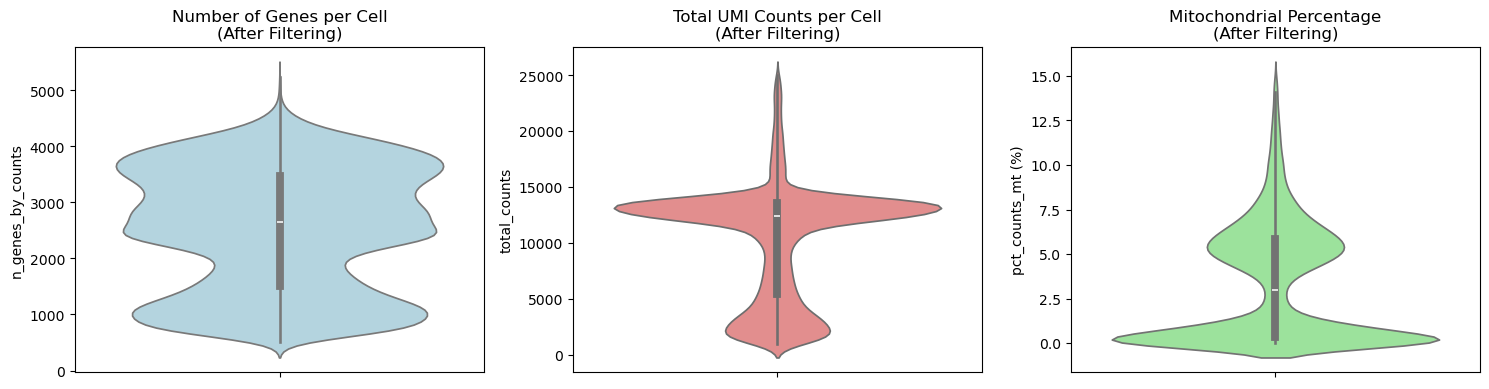

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# ËÆ°ÁÆóÁ∫øÁ≤í‰ΩìÊØî‰æã
# -------------------------------
mt_gene_mask = adata_clean.var["feature_name"].str.lower().str.startswith("mt-")
adata_clean.obs["mt_counts"] = adata_clean[:, mt_gene_mask].X.sum(axis=1).A1
adata_clean.obs["total_counts"] = adata_clean.X.sum(axis=1).A1
adata_clean.obs["pct_counts_mt"] = adata_clean.obs["mt_counts"] / adata_clean.obs["total_counts"] * 100
adata_clean.obs["n_genes_by_counts"] = (adata_clean.X > 0).sum(axis=1).A1

print(adata_clean.obs[["n_genes_by_counts", "total_counts", "mt_counts", "pct_counts_mt"]].head())

# Êü•ÁúãÁ∫øÁ≤í‰ΩìÊØî‰æãÁªüËÆ°
print("\nÁ∫øÁ≤í‰ΩìÊØî‰æãÁªüËÆ°:")
print(adata_clean.obs["pct_counts_mt"].describe())

# Áõ¥Êé•‰ΩøÁî®‰Ω†ÁöÑËÆ°ÁÆóÁªìÊûúËøõË°åÁ≠õÈÄâ
# -------------------------------
min_genes = 500
max_genes = 6000
min_counts = 1000
max_counts = 25000
max_mt = 15  # ÁôæÂàÜÊØî

# Á≠õÈÄâÂâçÁöÑÁªÜËÉûÊï∞
print(f"\nÁ≠õÈÄâÂâçÁªÜËÉûÊï∞: {adata_clean.n_obs}")

# Â∫îÁî®Á≠õÈÄâÊù°‰ª∂ - ‰ΩøÁî®‰Ω†Ëá™Â∑±ËÆ°ÁÆóÁöÑpct_counts_mt
adata_qc = adata_clean[
    (adata_clean.obs["n_genes_by_counts"] >= min_genes) &
    (adata_clean.obs["n_genes_by_counts"] <= max_genes) &
    (adata_clean.obs["total_counts"] >= min_counts) &
    (adata_clean.obs["total_counts"] <= max_counts) &
    (adata_clean.obs["pct_counts_mt"] <= max_mt)
].copy()

print(f"Á≠õÈÄâÂêéÁªÜËÉûÊï∞: {adata_qc.n_obs}")
print(f"ËøáÊª§ÊéâÁöÑÁªÜËÉûÊï∞: {adata.n_obs - adata_qc.n_obs}")
print(f"‰øùÁïôÊØî‰æã: {adata_qc.n_obs/adata.n_obs*100:.1f}%")

# Êü•ÁúãÁ≠õÈÄâÂêéÁöÑÁªüËÆ°‰ø°ÊÅØ
print("\nÁ≠õÈÄâÂêén_genes_by_countsÁªüËÆ°:")
print(adata_qc.obs["n_genes_by_counts"].describe())

print("\nÁ≠õÈÄâÂêétotal_countsÁªüËÆ°:")
print(adata_qc.obs["total_counts"].describe())

# ÁªòÂà∂Á≠õÈÄâÂêéÁöÑQCÂõæ
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
sns.violinplot(y=adata_qc.obs['n_genes_by_counts'], color='lightblue')
plt.title('Number of Genes per Cell\n(After Filtering)')
plt.ylabel('n_genes_by_counts')

plt.subplot(1, 3, 2)
sns.violinplot(y=adata_qc.obs['total_counts'], color='lightcoral')
plt.title('Total UMI Counts per Cell\n(After Filtering)')
plt.ylabel('total_counts')

plt.subplot(1, 3, 3)
sns.violinplot(y=adata_qc.obs['pct_counts_mt'], color='lightgreen')
plt.title('Mitochondrial Percentage\n(After Filtering)')
plt.ylabel('pct_counts_mt (%)')

plt.tight_layout()
plt.savefig('qc_after_filtering.png', dpi=300, bbox_inches='tight')
plt.show()

In [7]:
# ËøêË°åPCAÔºå‰øùÁïô50‰∏™‰∏ªÊàêÂàÜ
sc.tl.pca(adata_qc, n_comps=50, svd_solver="arpack")

# Á°ÆËÆ§PCAÁªìÊûúÂ∑≤ÁªèÂ≠òÂÇ®
print(adata_qc.obsm.keys())  # ËøôÂ∫îËØ•ËæìÂá∫ 'X_pca'


KeysView(AxisArrays with keys: X_pca, X_umap)


In [8]:
# ‰ΩøÁî®HarmonyÂéªÈô§ÊâπÊ¨°ÊïàÂ∫î
scx.pp.harmony_integrate(adata_qc, key='batch')  # 'batch' ÊòØÊâπÊ¨°‰ø°ÊÅØÁöÑÂàóÂêç

# ÊàñËÄÖ‰ΩøÁî®ComBatÂéªÈô§ÊâπÊ¨°ÊïàÂ∫îÔºàÂ¶ÇÊûúÈúÄË¶ÅÔºâ
# sc.pp.combat(adata_qc, key='batch')


2025-10-22 17:14:49,297 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2025-10-22 17:14:53,440 - harmonypy - INFO - sklearn.KMeans initialization complete.
2025-10-22 17:14:53,584 - harmonypy - INFO - Iteration 1 of 10
2025-10-22 17:15:06,572 - harmonypy - INFO - Iteration 2 of 10
2025-10-22 17:15:19,109 - harmonypy - INFO - Iteration 3 of 10
2025-10-22 17:15:31,848 - harmonypy - INFO - Iteration 4 of 10
2025-10-22 17:15:44,383 - harmonypy - INFO - Iteration 5 of 10
2025-10-22 17:15:56,867 - harmonypy - INFO - Iteration 6 of 10
2025-10-22 17:16:09,467 - harmonypy - INFO - Iteration 7 of 10
2025-10-22 17:16:21,941 - harmonypy - INFO - Converged after 7 iterations


/home/cluster2/tangzefang/yangbo/miniconda3/envs/jupyter/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:328: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


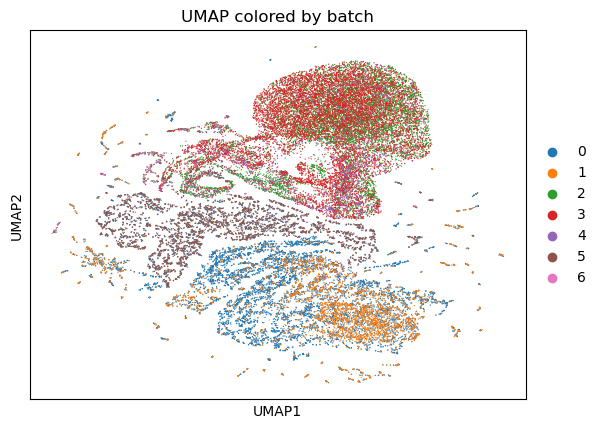

In [9]:
#Áúã‰∏Ä‰∏ã‰∏çÂêåÊâπÊ¨°ÁöÑÁªÜËÉûÈÉΩÈáçÂêàÂ∫¶ÔºåÁÑ∂ÂêéÁî®harmonyÂíåcombatÂéªÈô§ÊâπÊ¨°ÊïàÂ∫î
# ‰ΩøÁî®UMAPËøõË°åÈôçÁª¥ÂèØËßÜÂåñ
sc.pp.neighbors(adata_qc, n_neighbors=15, n_pcs=50)  # ‰ΩøÁî®Ââç50‰∏™‰∏ªÊàêÂàÜ
sc.tl.umap(adata_qc)

# Êü•ÁúãUMAPÂõæÔºåÊåâÊâπÊ¨°ÁùÄËâ≤
sc.pl.umap(adata_qc, color='batch', title="UMAP colored by batch")

In [14]:
# Êü•ÁúãÊØè‰∏™ÊâπÊ¨°ÁöÑÁªÜËÉûÊÄªÊï∞
print("ÊØè‰∏™ÊâπÊ¨°ÁöÑÁªÜËÉûÊï∞Èáè:")
print(adata.obs['batch'].value_counts().sort_index())

# Êü•ÁúãÊØè‰∏™ÊâπÊ¨°‰∏≠ÁªÜËÉûÁ±ªÂûãÁöÑÂàÜÂ∏ÉÊÉÖÂÜµ
print("\nÊØè‰∏™ÊâπÊ¨°ÁöÑÁªÜËÉûÁ±ªÂûãÂàÜÂ∏É:")
for batch in sorted(adata.obs['batch'].unique()):
    batch_data = adata.obs[adata.obs['batch'] == batch]
    print(f"\nÊâπÊ¨° {batch}:")
    print(f"  ÁªÜËÉûÊÄªÊï∞: {len(batch_data)}")
    print(f"  ÁªÜËÉûÁ±ªÂûãÊï∞Èáè: {batch_data['cell_type'].nunique()}")
    print(f"  ‰∏ªË¶ÅÁªÜËÉûÁ±ªÂûã:")
    print(batch_data['cell_type'].value_counts().head(10))

ÊØè‰∏™ÊâπÊ¨°ÁöÑÁªÜËÉûÊï∞Èáè:
batch
0    10000
1    10000
2    10000
3    10000
4    10000
5    10000
6     2121
Name: count, dtype: int64

ÊØè‰∏™ÊâπÊ¨°ÁöÑÁªÜËÉûÁ±ªÂûãÂàÜÂ∏É:

ÊâπÊ¨° 0:
  ÁªÜËÉûÊÄªÊï∞: 10000
  ÁªÜËÉûÁ±ªÂûãÊï∞Èáè: 34
  ‰∏ªË¶ÅÁªÜËÉûÁ±ªÂûã:
cell_type
germinal center B cell                                  1339
enterocyte of epithelium of large intestine             1125
plasma cell                                              923
naive thymus-derived CD4-positive, alpha-beta T cell     885
naive thymus-derived CD8-positive, alpha-beta T cell     801
B cell zone reticular cell                               673
macrophage                                               579
regulatory T cell                                        479
CD103-positive dendritic cell                            428
intestinal crypt stem cell                               339
Name: count, dtype: int64

ÊâπÊ¨° 1:
  ÁªÜËÉûÊÄªÊï∞: 10000
  ÁªÜËÉûÁ±ªÂûãÊï∞Èáè: 37
  ‰∏ªË¶ÅÁªÜËÉûÁ±ªÂûã:
cell_type
enterocyte

/home/cluster2/tangzefang/yangbo/miniconda3/envs/jupyter/lib/python3.10/site-packages/umap/umap_.py:1401: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


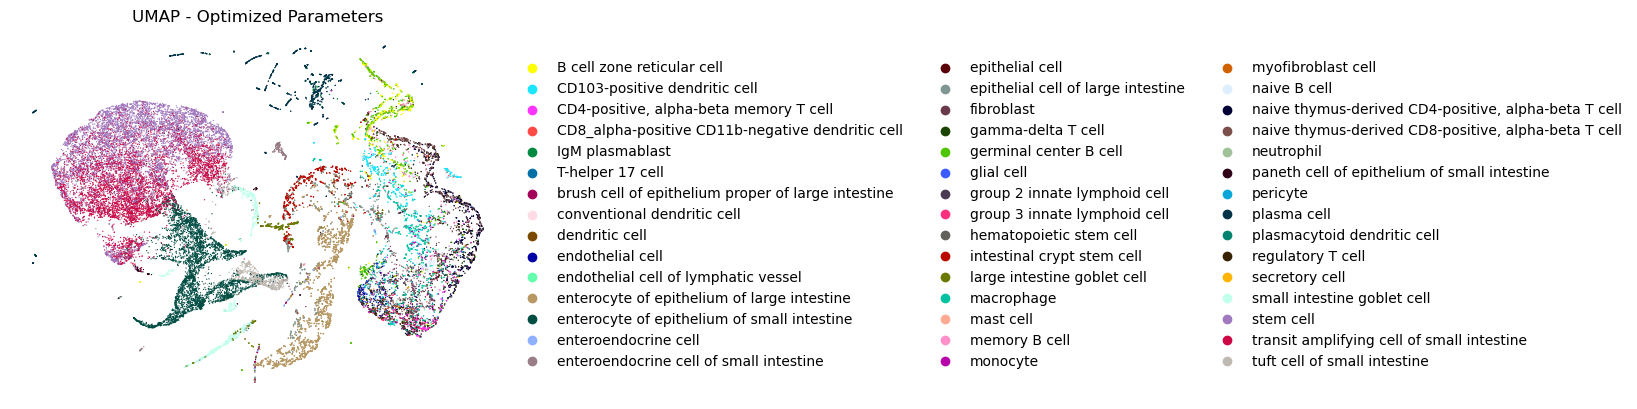

<Figure size 640x480 with 0 Axes>

KeyError: 'leiden_0.5'

In [10]:
sdata_inte = adata_qc.copy() 

n_PCs, umap_n_neighbors, umap_n_pcs, min_dist, spread_t = [50, 50, 30, 0.01, 5] 
pc_feature = 'X_pca'

sc.pp.neighbors(sdata_inte, n_neighbors=umap_n_neighbors, n_pcs=umap_n_pcs, use_rep=pc_feature)
sc.tl.umap(sdata_inte, min_dist=min_dist, spread=spread_t)  # ‰øÆÊ≠£ÂèÇÊï∞Âêç

sc.pl.umap(sdata_inte, color=['cell_type'], 
           title='UMAP - Optimized Parameters',
           frameon=False, legend_loc='right margin') 
plt.savefig('umap_optimized.png', dpi=300, bbox_inches='tight')
plt.show()


# markerÂàÜÊûêÔºåÊü•ÁúãÊØè‰∏™ËÅöÁ±ª‰∏≠ÊòæËëóÂü∫Âõ†
sc.tl.rank_genes_groups(adata_qc, groupby='leiden_0.5') 
sc.pl.rank_genes_groups(adata_qc, n_genes=20, sharey=False)

In [ ]:
import pandas as pd

# 1. È¶ñÂÖàÂä†ËΩΩÂü∫Âõ†ÂàóË°®Êñá‰ª∂
neural_genes = pd.read_csv('Neural_genesymbol_list_mus_musculus.csv')
gene_pairs = pd.read_csv('NeuronChat_gene_pairs_mus_musculus.csv')
# Á≠õÈÄâÁ•ûÁªèÁõ∏ÂÖ≥Âü∫Âõ†
neural_genes_set = set(neural_genes['gene_symbol'])  # ËΩ¨Êç¢‰∏∫ÈõÜÂêà‰æø‰∫éÂø´ÈÄüÊü•Êâæ

# ‰ªéNeuronChat_gene_pairs‰∏≠Á≠õÈÄâÁ•ûÁªèÁõ∏ÂÖ≥ÁöÑÈÖç‰ΩìÂíåÂèó‰Ωì
ligands = gene_pairs[(gene_pairs['gene_symbol'].isin(neural_genes_set)) & (gene_pairs['type'] == 'ligand')]
receptors = gene_pairs[(gene_pairs['gene_symbol'].isin(neural_genes_set)) & (gene_pairs['type'] == 'receptor')]

# ÊâìÂç∞Á≠õÈÄâÂêéÁöÑÈÖç‰ΩìÂíåÂèó‰Ωì
print("\nFiltered ligands:")
print(ligands)

print("\nFiltered receptors:")
print(receptors)


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import sparse

# 1. Âä†ËΩΩÊï∞ÊçÆ
neural_genes = pd.read_csv('Neural_genesymbol_list_mus_musculus.csv')
gene_pairs = pd.read_csv('NeuronChat_gene_pairs_mus_musculus.csv')

# Â∞Üneural_genes['gene_symbol']ËΩ¨Êç¢‰∏∫ÈõÜÂêàÔºå‰ª•‰æøÂø´ÈÄüÊü•Êâæ
neural_genes_set = set(neural_genes['gene_symbol'])

# Âü∫‰∫éÂü∫Âõ†Á¨¶Âè∑Á≠õÈÄâÈÖç‰ΩìÂíåÂèó‰Ωì
ligands = gene_pairs[(gene_pairs['gene_symbol'].isin(neural_genes_set)) & (gene_pairs['type'] == 'ligand')]
receptors = gene_pairs[(gene_pairs['gene_symbol'].isin(neural_genes_set)) & (gene_pairs['type'] == 'receptor')]

print("Á≠õÈÄâÂêéÁöÑÈÖç‰ΩìÊï∞Èáè:", len(ligands))
print("Á≠õÈÄâÂêéÁöÑÂèó‰ΩìÊï∞Èáè:", len(receptors))

# 2. Ê£ÄÊü•Êï∞ÊçÆÁä∂ÊÄÅ
print("\n=== Êï∞ÊçÆÁä∂ÊÄÅÊ£ÄÊü• ===")
print(f"adata_qc.raw is None: {adata_qc.raw is None}")
print(f"adata_qc.shape: {adata_qc.shape}")
print(f"adata_qc.var_names Êï∞Èáè: {len(adata_qc.var_names)}")

# 3. ‰ΩøÁî®‰∏ªÊï∞ÊçÆËÄå‰∏çÊòØrawÊï∞ÊçÆ
gene_names = adata_qc.var_names  # ‰ΩøÁî®‰∏ªÊï∞ÊçÆÁöÑÂü∫Âõ†Âêç

In [20]:
# ÂàõÂª∫Âü∫Âõ†Á¨¶Âè∑Âà∞Êï∞Â≠óIDÁöÑÊò†Â∞Ñ
feature_name_to_id = dict(zip(adata_qc.var['feature_name'], adata_qc.var.index))

print(f"ÂàõÂª∫‰∫Ü {len(feature_name_to_id)} ‰∏™Âü∫Âõ†ÁöÑÊò†Â∞Ñ")
print("Êò†Â∞ÑÁ§∫‰æã:", list(feature_name_to_id.items())[:5])

# ÈáçÊñ∞Á≠õÈÄâÂèØÁî®ÁöÑÈÖç‰ΩìÂíåÂèó‰Ωì
available_ligands = []
for gene in ligands['gene_symbol']:
    if gene in feature_name_to_id:
        available_ligands.append(feature_name_to_id[gene])  # Â≠òÂÇ®Êï∞Â≠óID

available_receptors = []
for gene in receptors['gene_symbol']:
    if gene in feature_name_to_id:
        available_receptors.append(feature_name_to_id[gene])

print(f"\n=== ÂåπÈÖçÁªìÊûú ===")
print(f"ÊâæÂà∞ÁöÑÈÖç‰Ωì: {len(available_ligands)}/{len(ligands)}")
print(f"ÊâæÂà∞ÁöÑÂèó‰Ωì: {len(available_receptors)}/{len(receptors)}")

# ÊòæÁ§∫ÂåπÈÖçÁöÑÂü∫Âõ†
if available_ligands:
    matched_ligands = [gene for gene in ligands['gene_symbol'] if gene in feature_name_to_id]
    print("\nÂåπÈÖçÁöÑÈÖç‰ΩìÁ§∫‰æã:", matched_ligands[:10])
if available_receptors:
    matched_receptors = [gene for gene in receptors['gene_symbol'] if gene in feature_name_to_id]
    print("ÂåπÈÖçÁöÑÂèó‰ΩìÁ§∫‰æã:", matched_receptors[:10])

ÂàõÂª∫‰∫Ü 53850 ‰∏™Âü∫Âõ†ÁöÑÊò†Â∞Ñ
Êò†Â∞ÑÁ§∫‰æã: [('Vti1b', '0'), ('Hlx', '1'), ('Dhx58os', '2'), ('Gm16070', '3'), ('Sfswap', '4')]

=== ÂåπÈÖçÁªìÊûú ===
ÊâæÂà∞ÁöÑÈÖç‰Ωì: 65/65
ÊâæÂà∞ÁöÑÂèó‰Ωì: 154/154

ÂåπÈÖçÁöÑÈÖç‰ΩìÁ§∫‰æã: ['Vip', 'Npy', 'Sst', 'Penk', 'Tac2', 'Cck', 'Crh', 'Tac1', 'Pdyn', 'Cort']
ÂåπÈÖçÁöÑÂèó‰ΩìÁ§∫‰æã: ['Vipr1', 'Vipr2', 'Npy1r', 'Npy2r', 'Npy5r', 'Sstr1', 'Sstr2', 'Sstr3', 'Sstr4', 'Oprd1']


In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import sparse

print("=== ÂÆåÊï¥ÁöÑÈÖç‰Ωì-Âèó‰Ωì‰∫í‰ΩúÂàÜÊûê ===")

# 1. ÈáçÊñ∞ÂàõÂª∫Âü∫Âõ†Á¨¶Âè∑Âà∞Êï∞Â≠óIDÁöÑÊò†Â∞Ñ
feature_name_to_id = dict(zip(adata_qc.var['feature_name'], adata_qc.var.index))

# 2. ÈáçÊñ∞ÊâæÂà∞ÂåπÈÖçÁöÑÂü∫Âõ†ID
available_ligand_ids = []
available_ligand_names = []
for gene in ligands['gene_symbol']:
    if gene in feature_name_to_id:
        available_ligand_ids.append(feature_name_to_id[gene])
        available_ligand_names.append(gene)

available_receptor_ids = []
available_receptor_names = []
for gene in receptors['gene_symbol']:
    if gene in feature_name_to_id:
        available_receptor_ids.append(feature_name_to_id[gene])
        available_receptor_names.append(gene)

print(f"ÊâæÂà∞ÁöÑÈÖç‰Ωì: {len(available_ligand_ids)}")
print(f"ÊâæÂà∞ÁöÑÂèó‰Ωì: {len(available_receptor_ids)}")
print(f"Â∞ÜËÆ°ÁÆó {len(available_ligand_ids)} √ó {len(available_receptor_ids)} = {len(available_ligand_ids) * len(available_receptor_ids)} ÂØπÁªÑÂêà")

if available_ligand_names:
    print("ÈÖç‰ΩìÁ§∫‰æã:", available_ligand_names[:5])
if available_receptor_names:
    print("Âèó‰ΩìÁ§∫‰æã:", available_receptor_names[:5])

=== ÂÆåÊï¥ÁöÑÈÖç‰Ωì-Âèó‰Ωì‰∫í‰ΩúÂàÜÊûê ===
ÊâæÂà∞ÁöÑÈÖç‰Ωì: 65
ÊâæÂà∞ÁöÑÂèó‰Ωì: 154
Â∞ÜËÆ°ÁÆó 65 √ó 154 = 10010 ÂØπÁªÑÂêà
ÈÖç‰ΩìÁ§∫‰æã: ['Vip', 'Npy', 'Sst', 'Penk', 'Tac2']
Âèó‰ΩìÁ§∫‰æã: ['Vipr1', 'Vipr2', 'Npy1r', 'Npy2r', 'Npy5r']


In [22]:
# üö® Á´ãÂç≥‰øùÂ≠òÂ∑≤ÊúâÁªìÊûúÔºÅ
import scanpy as sc
import pandas as pd
from datetime import datetime

print("Ê≠£Âú®‰øùÂ≠òÊâÄÊúâÂ∑≤ÊúâÁªìÊûú...")

# 1. ‰øùÂ≠òÂ§ÑÁêÜÂ•ΩÁöÑÂçïÁªÜËÉûÊï∞ÊçÆÔºàÂåÖÂê´Ë¥®Êéß„ÄÅÊâπÊ¨°Ê†°Ê≠£„ÄÅUMAP„ÄÅËÅöÁ±ªÔºâ
filename = "mouse_gut_processed_with_umap.h5ad"
adata_qc.write(filename)
print(f"‚úÖ ÂçïÁªÜËÉûÊï∞ÊçÆÂ∑≤‰øùÂ≠ò: {filename}")

# 2. ‰øùÂ≠òÂü∫Âõ†ÂàóË°®ÂíåÁ≠õÈÄâÁªìÊûú
ligands.to_csv('saved_neural_ligands (2).csv', index=False)
receptors.to_csv('saved_neural_receptors (2).csv', index=False)
print("‚úÖ Âü∫Âõ†ÂàóË°®Â∑≤‰øùÂ≠ò")

# 3. ‰øùÂ≠òÂü∫Âõ†Êò†Â∞ÑÂÖ≥Á≥ª
import pickle
feature_name_to_id = dict(zip(adata_qc.var['feature_name'], adata_qc.var.index))

save_data = {
    'feature_name_to_id': feature_name_to_id,
    'available_ligand_ids': available_ligand_ids,
    'available_ligand_names': available_ligand_names, 
    'available_receptor_ids': available_receptor_ids,
    'available_receptor_names': available_receptor_names,
    'save_time': datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
    'data_info': {
        'cells': adata_qc.n_obs,
        'genes': adata_qc.n_vars,
        'ligands_found': len(available_ligand_ids),
        'receptors_found': len(available_receptor_ids)
    }
}

with open('analysis_progress.pkl', 'wb') as f:
    pickle.dump(save_data, f)

print("‚úÖ ÂàÜÊûêËøõÂ∫¶ÂíåÊò†Â∞ÑÂÖ≥Á≥ªÂ∑≤‰øùÂ≠ò")

# 4. ÂàõÂª∫ÊÅ¢Â§çËØ¥Êòé
with open('RECOVERY_INSTRUCTIONS.txt', 'w') as f:
    f.write("ÊÅ¢Â§çÂàÜÊûêÊ≠•È™§:\n")
    f.write("1. Âä†ËΩΩÂçïÁªÜËÉûÊï∞ÊçÆ: adata_qc = sc.read('mouse_gut_processed_with_umap.h5ad')\n")
    f.write("2. Âä†ËΩΩÂü∫Âõ†ÂàóË°®: ligands = pd.read_csv('saved_neural_ligands.csv')\n")
    f.write("3. Âä†ËΩΩËøõÂ∫¶Êï∞ÊçÆ: with open('analysis_progress.pkl', 'rb') as f: progress = pickle.load(f)\n")
    f.write("4. ÊÅ¢Â§çÂèòÈáè: available_ligand_ids = progress['available_ligand_ids'] Á≠â\n")
    f.write(f"\n‰øùÂ≠òÊó∂Èó¥: {datetime.now()}\n")

print("‚úÖ ÊÅ¢Â§çËØ¥ÊòéÂ∑≤ÂàõÂª∫: RECOVERY_INSTRUCTIONS.txt")

print("\nüéâ ÊâÄÊúâÁªìÊûúÂ∑≤‰øùÂ≠òÔºÅÁé∞Âú®ÂèØ‰ª•ÂÆâÂÖ®ÂÅúÊ≠¢ËøêË°å„ÄÇ")
print("Â∑≤‰øùÂ≠òÁöÑÊñá‰ª∂:")
print("   - mouse_gut_processed_with_umap.h5ad (‰∏ªË¶ÅÊï∞ÊçÆ)")
print("   - saved_neural_ligands.csv (ÈÖç‰ΩìÂàóË°®)")
print("   - saved_neural_receptors.csv (Âèó‰ΩìÂàóË°®)") 
print("   - analysis_progress.pkl (ÂàÜÊûêËøõÂ∫¶)")
print("   - RECOVERY_INSTRUCTIONS.txt (ÊÅ¢Â§çÊåáÂçó)")

Ê≠£Âú®‰øùÂ≠òÊâÄÊúâÂ∑≤ÊúâÁªìÊûú...
‚úÖ ÂçïÁªÜËÉûÊï∞ÊçÆÂ∑≤‰øùÂ≠ò: mouse_gut_processed_with_umap.h5ad
‚úÖ Âü∫Âõ†ÂàóË°®Â∑≤‰øùÂ≠ò
‚úÖ ÂàÜÊûêËøõÂ∫¶ÂíåÊò†Â∞ÑÂÖ≥Á≥ªÂ∑≤‰øùÂ≠ò
‚úÖ ÊÅ¢Â§çËØ¥ÊòéÂ∑≤ÂàõÂª∫: RECOVERY_INSTRUCTIONS.txt

üéâ ÊâÄÊúâÁªìÊûúÂ∑≤‰øùÂ≠òÔºÅÁé∞Âú®ÂèØ‰ª•ÂÆâÂÖ®ÂÅúÊ≠¢ËøêË°å„ÄÇ
Â∑≤‰øùÂ≠òÁöÑÊñá‰ª∂:
   - mouse_gut_processed_with_umap.h5ad (‰∏ªË¶ÅÊï∞ÊçÆ)
   - saved_neural_ligands.csv (ÈÖç‰ΩìÂàóË°®)
   - saved_neural_receptors.csv (Âèó‰ΩìÂàóË°®)
   - analysis_progress.pkl (ÂàÜÊûêËøõÂ∫¶)
   - RECOVERY_INSTRUCTIONS.txt (ÊÅ¢Â§çÊåáÂçó)


In [29]:




# 3. ËÆ°ÁÆó‰∫í‰ΩúÂº∫Â∫¶
interaction_strength = []

print("\nÂºÄÂßãËÆ°ÁÆó‰∫í‰ΩúÂº∫Â∫¶...")

for i, (ligand_id, ligand_name) in enumerate(zip(available_ligand_ids, available_ligand_names)):
    # ÊòæÁ§∫ËøõÂ∫¶
    if i % 10 == 0:
        print(f"Â§ÑÁêÜÈÖç‰Ωì {i+1}/{len(available_ligand_ids)}: {ligand_name}")
    
    try:
        # ‰ΩøÁî®Êï∞Â≠óIDËé∑ÂèñË°®ËææÈáè
        ligand_data = adata_qc[:, ligand_id].X
        if sparse.issparse(ligand_data):
            ligand_data = ligand_data.toarray()
        ligand_expr = float(ligand_data.mean())
        
        for receptor_id, receptor_name in zip(available_receptor_ids, available_receptor_names):
            try:
                # ‰ΩøÁî®Êï∞Â≠óIDËé∑ÂèñË°®ËææÈáè
                receptor_data = adata_qc[:, receptor_id].X
                if sparse.issparse(receptor_data):
                    receptor_data = receptor_data.toarray()
                receptor_expr = float(receptor_data.mean())
                
                # ËÆ°ÁÆó‰∫í‰ΩúÂº∫Â∫¶
                interaction_strength.append({
                    'Ligand': ligand_name,
                    'Receptor': receptor_name,
                    'Interaction_Strength': ligand_expr * receptor_expr,
                    'Ligand_Expr': ligand_expr,
                    'Receptor_Expr': receptor_expr
                })
                
            except Exception as e:
                print(f"Â§ÑÁêÜÂèó‰Ωì {receptor_name} Êó∂Âá∫Èîô: {e}")
                continue
                
    except Exception as e:
        print(f"Â§ÑÁêÜÈÖç‰Ωì {ligand_name} Êó∂Âá∫Èîô: {e}")
        continue

# 4. ËΩ¨Êç¢‰∏∫DataFrame
interaction_df = pd.DataFrame(interaction_strength)

print(f"\n=== ÂàÜÊûêÂÆåÊàê ===")
print(f"ÊàêÂäüËÆ°ÁÆó‰∫Ü {len(interaction_df)} ÂØπÈÖç‰Ωì-Âèó‰Ωì‰∫í‰Ωú")

if len(interaction_df) > 0:
    print(f"\nË°®ËææÈáèÁªüËÆ°:")
    print(f"ÈÖç‰ΩìÂπ≥ÂùáË°®ËææÈáèËåÉÂõ¥: {interaction_df['Ligand_Expr'].min():.6f} - {interaction_df['Ligand_Expr'].max():.6f}")
    print(f"Âèó‰ΩìÂπ≥ÂùáË°®ËææÈáèËåÉÂõ¥: {interaction_df['Receptor_Expr'].min():.6f} - {interaction_df['Receptor_Expr'].max():.6f}")
    print(f"‰∫í‰ΩúÂº∫Â∫¶ËåÉÂõ¥: {interaction_df['Interaction_Strength'].min():.6f} - {interaction_df['Interaction_Strength'].max():.6f}")
    
    print("\nÂâç10ÂØπÊúÄÂº∫ÁöÑ‰∫í‰Ωú:")
    top_10 = interaction_df.nlargest(10, 'Interaction_Strength')
    for i, row in top_10.iterrows():
        print(f"  {row['Ligand']} - {row['Receptor']}: {row['Interaction_Strength']:.6f}")
    


ÂºÄÂßãËÆ°ÁÆó‰∫í‰ΩúÂº∫Â∫¶...
Â§ÑÁêÜÈÖç‰Ωì 1/65: Vip


KeyboardInterrupt: 

In [24]:
# üöÄ Âø´ÈÄüÊÅ¢Â§çÁâàÊú¨
import scanpy as sc
import pandas as pd
import pickle

# Âø´ÈÄüÂä†ËΩΩÊâÄÊúâÊï∞ÊçÆ
adata_qc = sc.read('mouse_gut_processed_with_umap.h5ad')
ligands = pd.read_csv('saved_neural_ligands.csv')
receptors = pd.read_csv('saved_neural_receptors.csv')

with open('analysis_progress.pkl', 'rb') as f:
    progress = pickle.load(f)

# Ëß£ÂåÖÊâÄÊúâÂèòÈáè
feature_name_to_id = progress['feature_name_to_id']
available_ligand_ids = progress['available_ligand_ids']
available_ligand_names = progress['available_ligand_names']
available_receptor_ids = progress['available_receptor_ids']
available_receptor_names = progress['available_receptor_names']

print("‚úÖ Âø´ÈÄüÊÅ¢Â§çÂÆåÊàê!")
print(f"Êï∞ÊçÆ: {adata_qc.n_obs}ÁªÜËÉû, {adata_qc.n_vars}Âü∫Âõ†")
print(f"ÈÖç‰Ωì: {len(available_ligand_ids)}, Âèó‰Ωì: {len(available_receptor_ids)}")

‚úÖ Âø´ÈÄüÊÅ¢Â§çÂÆåÊàê!
Êï∞ÊçÆ: 46764ÁªÜËÉû, 53850Âü∫Âõ†
ÈÖç‰Ωì: 65, Âèó‰Ωì: 154
